In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
im = plt.imread("response_matrix.png")
ims = plt.imread("response_matrix_slices1.png")

In [4]:
def gaussian(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/sig**2)

def sharp(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**4/sig**4)    

def reconstruct_matrix_function(etrue,erec):
    mu1 = -0.84082 + 0.99172*etrue
    mu2 = -1.25 + 0.99172*etrue
    sig1 = 0.025*etrue + 0.09
    sig2 = 0.055*etrue + 0.08
    factor = (0.055*etrue + 0.08)/0.4
    return np.maximum(gaussian(erec,mu1,sig1),factor*gaussian(erec,mu2,sig2))

def reconstruct_matrix_function2(etrue,erec):
    mu1 = -0.82 + 0.99172*etrue
    mu2 = -1.2 + 0.99172*etrue
    sig1 = 0.013*etrue + 0.09
    sig2 = 0.055*etrue + 0.08
    factor = (0.055*etrue + 0.08)/0.4
    factor1 = 0.7
    factor2 = 0.8
    return factor1*gaussian(erec,mu1,sig1)+factor2*gaussian(erec,mu2,sig2)

def rec(etrue,erec):
    mu1 = -0.84082 + 0.99172*etrue
    mu2 = -1.48036 + 1.06333*etrue
    sig1 = 0.025*etrue + 0.09
    sig2 = 0.055*etrue + 0.08
    factor = (0.055*etrue + 0.08)/0.4
    if erec > mu1+2*sig1:
        return 0.
    elif erec > etrue - 1.022:
        return sharp(erec,mu1,sig1)
    else:
        return factor*gaussian(erec,mu2,sig2)+0.01
    

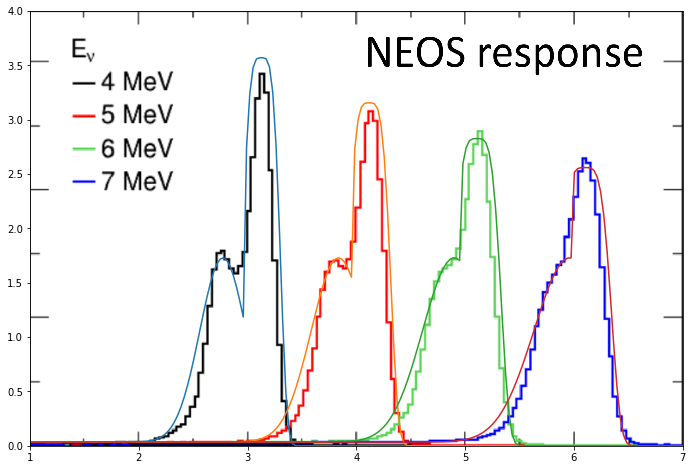

In [114]:
plt.figure(figsize=(16,8))
plt.imshow(ims,extent=[1,7,0,4])
x = np.linspace(1,7,200)
y = np.array([1.7*rec(4,i) for i in x])
y5 = np.array([1.7*rec(5,i) for i in x])
y6 = np.array([1.7*rec(6,i) for i in x])
y7 = np.array([1.7*rec(7,i) for i in x])
plt.plot(x,y)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.axis([1,7,0,4])
plt.show()

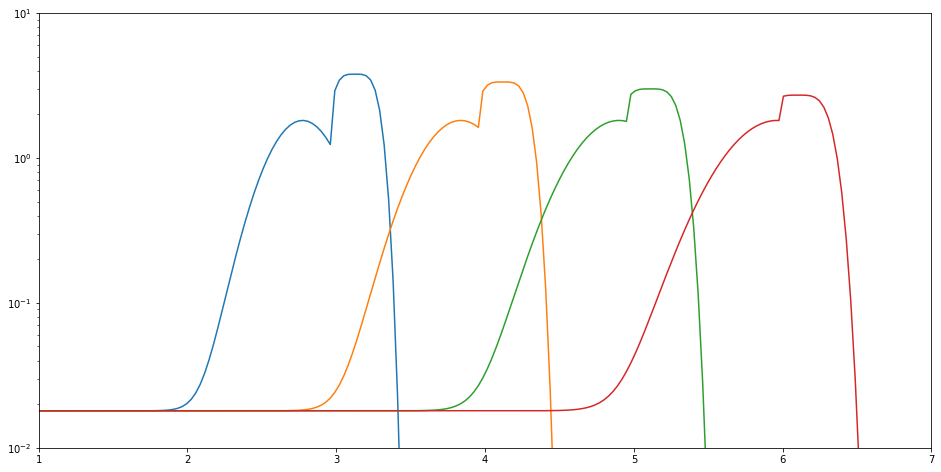

In [130]:
plt.figure(figsize=(16,8))
x = np.linspace(1,7,200)
y = np.array([1.8*rec(4,i) for i in x])
y5 = np.array([1.8*rec(5,i) for i in x])
y6 = np.array([1.8*rec(6,i) for i in x])
y7 = np.array([1.8*rec(7,i) for i in x])
plt.plot(x,y)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.yscale('log')
plt.axis([1,7,0.01,10])
plt.show()

<ipython-input-115-d6f1db834ee1>:6: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(x,y,np.log10(z))


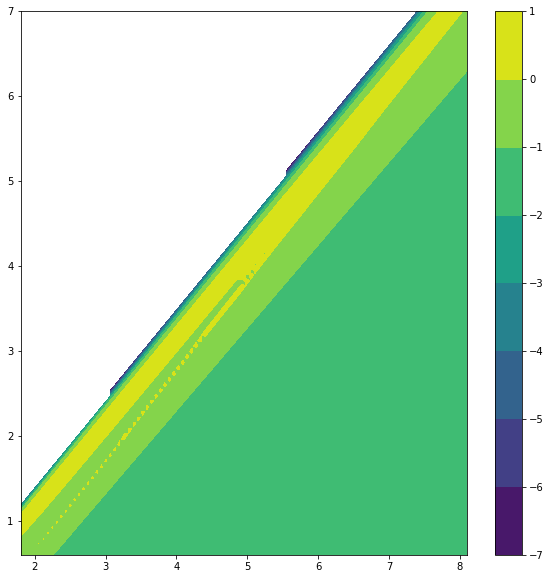

In [115]:
plt.figure(figsize=(10,10))
x = np.linspace(1.8,8.1,100)
y = np.linspace(0.6,7,100)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.array([[rec(ix,iy) for ix in x] for iy in y])
plt.contourf(x,y,np.log10(z))
plt.colorbar()
plt.show()

In [5]:
x = np.arange(0, 11.95, 0.05)
y = np.arange(0, 11.95, 0.05)
z = np.array([[rec(ix,iy) for ix in x] for iy in y])

In [7]:
np.savetxt("Data/ReconstructMatrix.dat",z,delimiter=",")